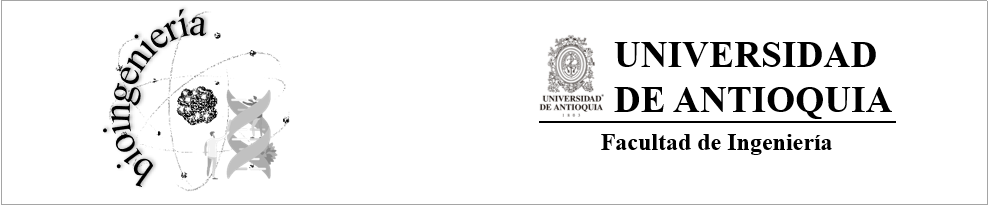

# Gradiente Descendente para aprendizaje automático

### Error Cuadrático Medio - Mean Squared Error
Es un forma de medir el error de un modelo de ML para problemas de regresión.

### $MSE = \frac{1}{N}\displaystyle\sum_{i=1}^{N}(y_i\ - \ f(x)_i)^2$

donde;

$y$ : valor real

$f(x)$ : valor de predicción

$N$ : número de muestras

Cuando se resuelven problemas con una sola variable, el error cuadrático medio tiene forma de parábola, cuando se trabajan con tres o más variables, no se puede graficas, pero el concepto es el mismo.


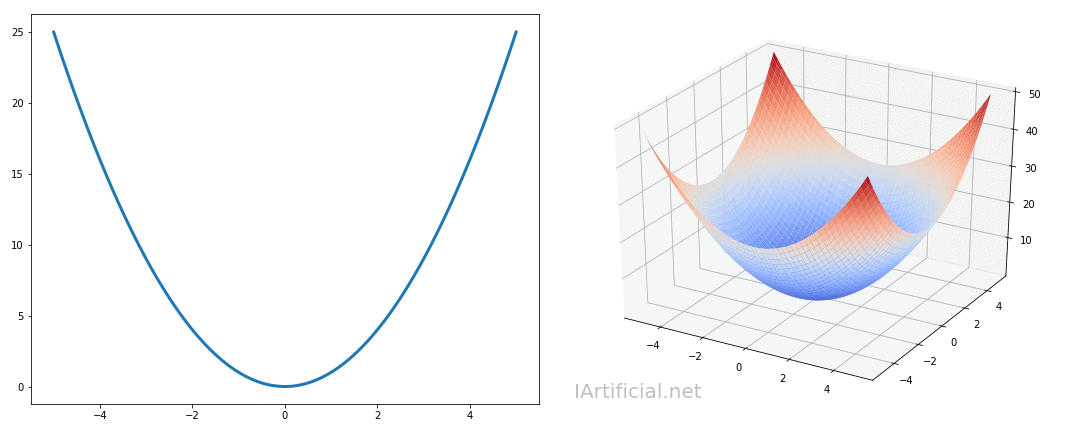

## Función de Coste

La función de costo $J$ es en su forma más simple, el error, el cual es el que se quiere minimizar en los modelos de ML.

$ J = MSE $

Nota: más adelante veremos que no siempre será el error, en algunos momentos habrá que agregar el término de regularización

# ¿Qué es el Gradiente?

Es una generalización de la derivada.

_"En matemáticas, la derivada de una función mide la rapidez con la que cambia el valor de dicha función matemática, según cambie el valor de su variable independiente. La derivada de una función es un concepto local, es decir, se calcula como el límite de la rapidez de cambio media de la función en cierto intervalo, cuando el intervalo considerado para la variable independiente se torna cada vez más pequeño. Por ello se habla del valor de la derivada de una función en un punto dado."_<br>
Fuente: wikipedia

## Método del Gradiente Descendiente

En muchas de las técnicas de ML, el <b>«aprendizaje»</b> consiste en encontrar qué parámetros $W$ minimizan la función de costo. Esta definición aplica para técnicas como regresión lineal y polinómica, regresión logística, deep learning, etc. <b>El gradiente descendente es un método de optimización numérica para estimar los mejores coeficientes.</b>

# Ejemplo

Recordemos cuándo teníamos la regresión lineal , teníamos una línea recta donde conocíamos los valores de las variables independientes $X$ y la dependiente $y$. Pero desconocíamos los valores de los parámetros $w$ y $b$

### $y = W^T . X + b$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

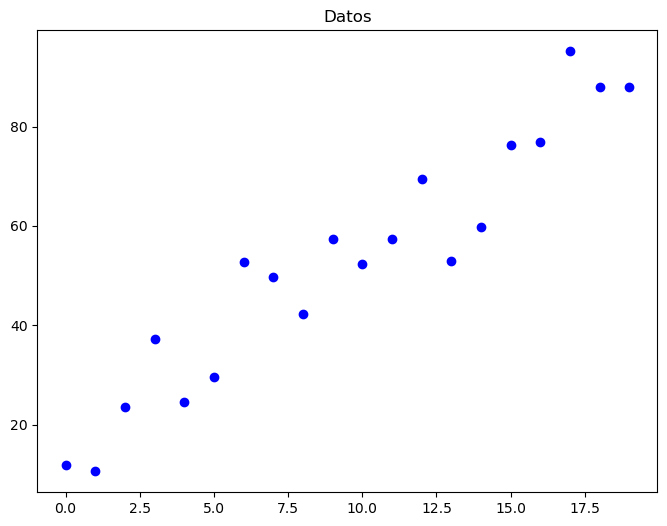

In [3]:
def f(x):
    np.random.seed(42)
    y = 5*x + 7 + 10*np.random.randn(x.shape[0])
    return y

x = np.arange(0, 20)
y = f(x)

plt.figure(figsize=(8,6))
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos');
plt.show()

## Hallemos el gradiente descendiente por tanteo

Sabemos que la ecuación de la recta está dada por:
## $y = f(x) = w.x + b$

Supongamos que $b = 0$, intentemos hallar la ecuación de la recta que mejor describe el comportamiento de los datos, dándole diferentes valores a $w$ y comprando las medidas de _Error Cuadrático Medico_ $MSE$

Creamos el modelos de regresión lineal y le asignamos manualmente los valores de $w$ y $b$

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
def error_linearReg(w , b):
    regresion_lineal = LinearRegression()
    regresion_lineal.intercept_ = b
    regresion_lineal.coef_ = np.array([w])
    prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
    mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
    return f'w = {w}  MSE = {mse}'

# $w = 1$

In [6]:
error_linearReg(w=1 , b=0)

'w = 1  MSE = 2228.4805439549127'

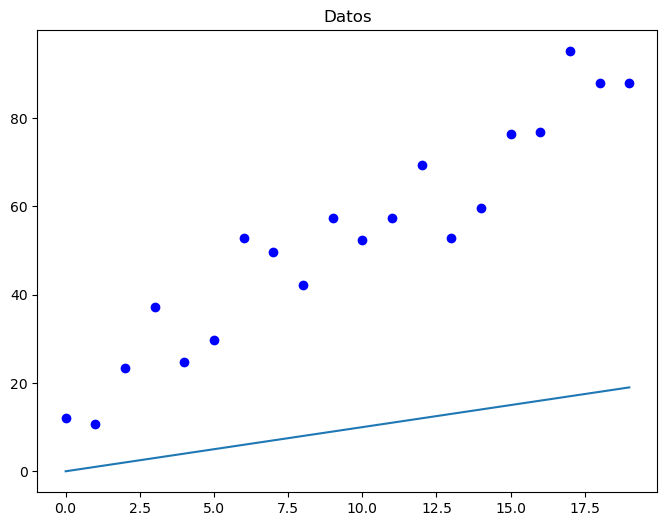

In [7]:
def f2(x , w):
    np.random.seed(42)
    y = w*x
    return y

x = np.arange(0, 20)
y = f(x)

w = 1
y2 = f2(x , w)

plt.figure(figsize=(8,6))
plt.scatter(x,y,label='data', color='blue')
plt.plot(x,y2)
plt.title('Datos');
plt.show()

# $w = 2$

In [8]:
error_linearReg(w=2 , b=0)

'w = 2  MSE = 1329.7378342813258'

### Ejercicio
Evaluar esta función en diferentes $w = [1\ ,\ 2\ ,\ ...\ ,\ 10]$

In [9]:
for i in range(11):
    print(error_linearReg(w=i , b=0))


w = 0  MSE = 3374.2232536284996
w = 1  MSE = 2228.4805439549127
w = 2  MSE = 1329.7378342813258
w = 3  MSE = 677.995124607739
w = 4  MSE = 273.2524149341522
w = 5  MSE = 115.50970526056531
w = 6  MSE = 204.76699558697848
w = 7  MSE = 541.0242859133916
w = 8  MSE = 1124.2815762398047
w = 9  MSE = 1954.538866566218
w = 10  MSE = 3031.796156892631


### Gráfica de todos los rectas con los diferentes $w$

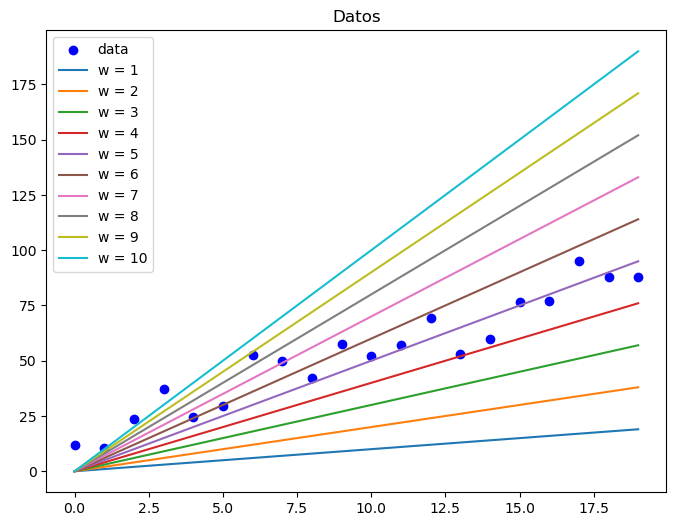

In [10]:
def f2(x , w):
    np.random.seed(42)
    y = w*x
    return y

x = np.arange(0, 20)
y = f(x)

plt.figure(figsize=(8,6))
plt.scatter(x,y,label='data', color='blue')

for w in np.arange(1,11):
    y2 = f2(x , w)
    plt.plot(x,y2 , label=f'w = {w}')
plt.title('Datos');
plt.legend()
plt.show()

Calculando los ERRORES ($MSE$)

In [11]:
errors = []
for w in np.arange(1,11):
    regresion_lineal = LinearRegression()
    regresion_lineal.intercept_ = 0 # b = 0
    regresion_lineal.coef_ = np.array([w])

    prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
    mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
    errors.append(mse)
    print(f' w = {w} , MSE = {mse}')
print(f'Error mínimo : {min(errors)}')

 w = 1 , MSE = 2228.4805439549127
 w = 2 , MSE = 1329.7378342813258
 w = 3 , MSE = 677.995124607739
 w = 4 , MSE = 273.2524149341522
 w = 5 , MSE = 115.50970526056531
 w = 6 , MSE = 204.76699558697848
 w = 7 , MSE = 541.0242859133916
 w = 8 , MSE = 1124.2815762398047
 w = 9 , MSE = 1954.538866566218
 w = 10 , MSE = 3031.796156892631
Error mínimo : 115.50970526056531


### ¿Por qué se dice que el error tiene forma de parábola?

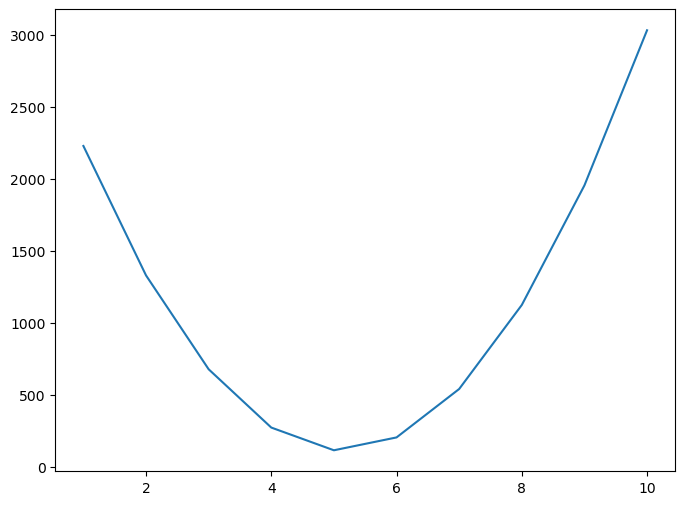

In [12]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11), errors)

## Hallemos el gradiente descendiente automáticamente

Dejemos que ahora el algoritmo de Regresión Lineal haga el proceso de optimización, es decir, que halle los mejores parámetro $w$ y $b$ para los que el error ($MSE$) sea el más pequeño.

In [13]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(x.reshape(-1,1), y)
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [4.00435243], b = 14.745666335933947


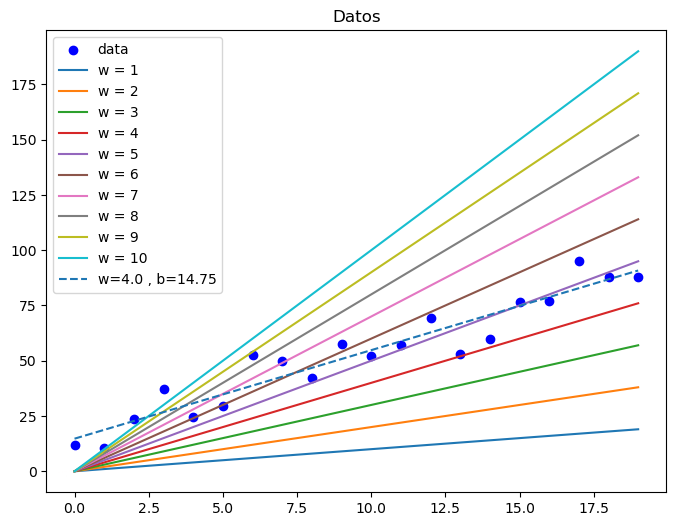

In [14]:
def f_op(x , w , b):
    np.random.seed(42)
    y = w*x + b
    return y

x = np.arange(0, 20)
y = f(x)

plt.figure(figsize=(8,6))
plt.scatter(x,y,label='data', color='blue')

for w in np.arange(1,11):
    y2 = f2(x , w)
    plt.plot(x,y2 , label=f'w = {w}')

w = 4.00435243
b = 14.745666335933947
y_op = f_op(x,w,b)
plt.plot(x,y_op , '--',label=f'w={round(w,2)} , b={round(b,2)}')
plt.title('Datos');
plt.legend()
plt.show()

El algoritmo de gradiente descendente, es el que permite encontrar estos valores de los coefientes más óptimos en forma automática

### ¿Cómo funciona?

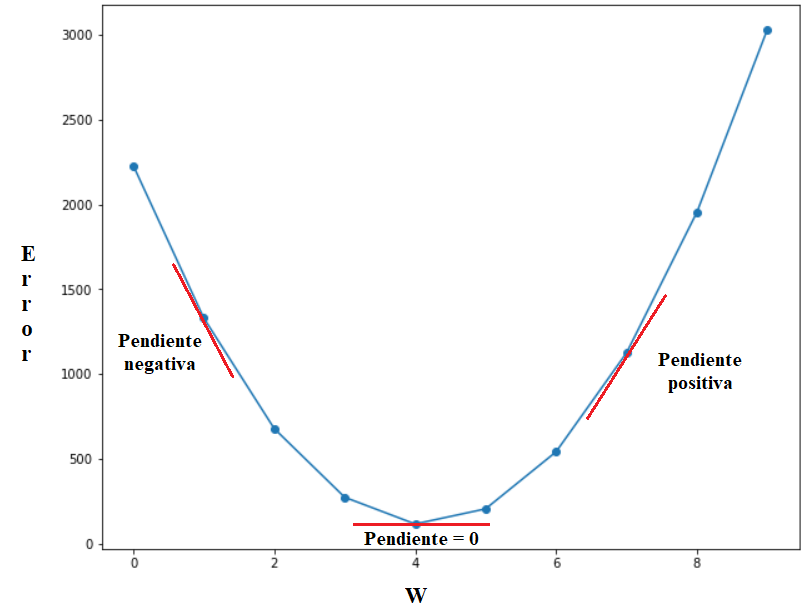

# $w \leftarrow w - \alpha * gradiente$

donde;

$\alpha$: es la taza de aprendizaje (_Learning Rate_)

### 1. Se deben definir los valores:
    - α :Taza de aprendizaje
    - El número de iteraciones: cuántas veces se va a repetir el algoritmo.
    - El w lo inicializa aleatoriamente el algoritmo

### 2. Una vez iniciado el algoritmo del GD
    - Se evalua la función de costo en el primer punto aleatorio w
    - Si la derivada (pendiente o gradiente) de esa función evaluada en ese punto es negativa, el valor de α por el
      gradiente, se suma al valor actual de w y así se genera el nuevo w para la siguiente iteración

Supongamos que $w_0 = 1$ y $\alpha = 1$ en la primera iteración del gradiente, entonces la ecuación de actualización de $w$ se vería así para la iteración #2

#### $w_1 = 1 - 1 * (- gradiente)$
supongamos que el valor de esa derivada en ese punto es 1, entonces la ecuación quedaría:
#### $w_1 = 1 - 1 * (- 1)$
Resolviendo,
#### $w_1 = 1 + 1 $
entonces,
#### $w_1 = 2$

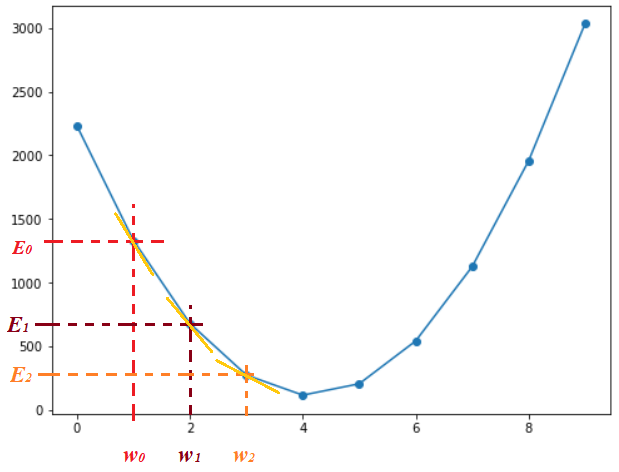



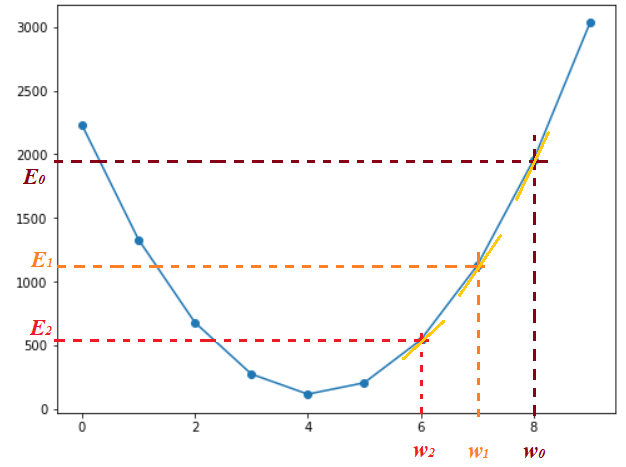

Ahora... qué pasaría que el valor del $w$ está al otro lado de la gráfica?

Supongamos que $w_0 = 8$ y $\alpha = 1$ en la primera iteración del gradiente, entonces la ecuación de actualización de $w$ se vería así para la iteración #2

#### $w_1 = 8 - 1 * (gradiente)$
supongamos que el valor de esa derivada en ese punto es 1, entonces la ecuación quedaría:
#### $w_1 = 8 - 1 * (1)$
Resolviendo,
#### $w_1 = 8 - 1 $
entonces,
#### $w_1 = 7$

### En téminos generales, la actualización de los parámetros se ve de la siguiente forma

##  $w_0 := w_0 - \alpha \cdot \frac{1}{m} \cdot \displaystyle\sum_{i=1}^{m}{(h_w(x^{(i)}) - y^{(i)})}$

donde;

##  $\frac{1}{m} \cdot \displaystyle\sum_{i=1}^{m}{(h_w(x^{(i)}) - y^{(i)})}$

es el gradiente que se debe derivar con respecto a $w$ y evaluar.

## $\frac{\partial}{\partial w_0} J(w_0 )$

## Se debe tener cuidad con la elección del $Learning\ Rate\ (\alpha)$

##### Para el caso de $Learning Rate$ $\downarrow\downarrow\downarrow\downarrow$ (muy pequeño)

Error mínimo : 113.32043429320659


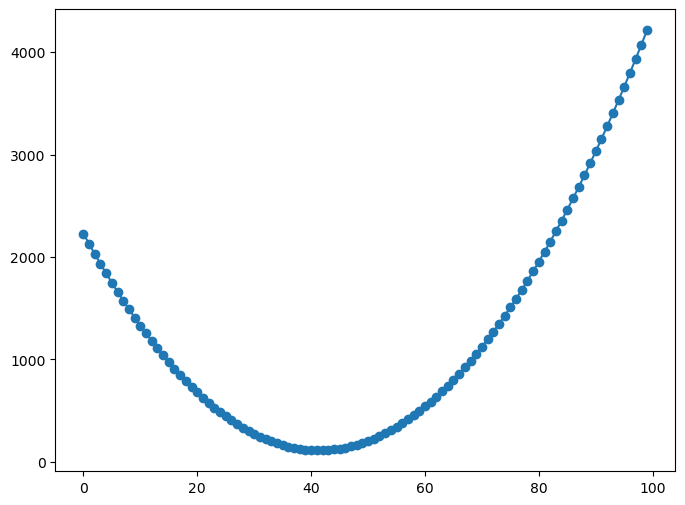

In [15]:
errors = []
for w in np.arange(1,11,.1):
    regresion_lineal = LinearRegression()
    regresion_lineal.intercept_ = 0 # b = 0
    regresion_lineal.coef_ = np.array([w])

    prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
    mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
    errors.append(mse)
print(f'Error mínimo : {min(errors)}')
plt.figure(figsize=(8,6))
plt.plot(errors , '-o')
plt.show()

Pero el caso más grave se presenta cuando la fución de costo además del <b>mínimo absoluto</b>, también tiene <b>mínimos locales</b>.

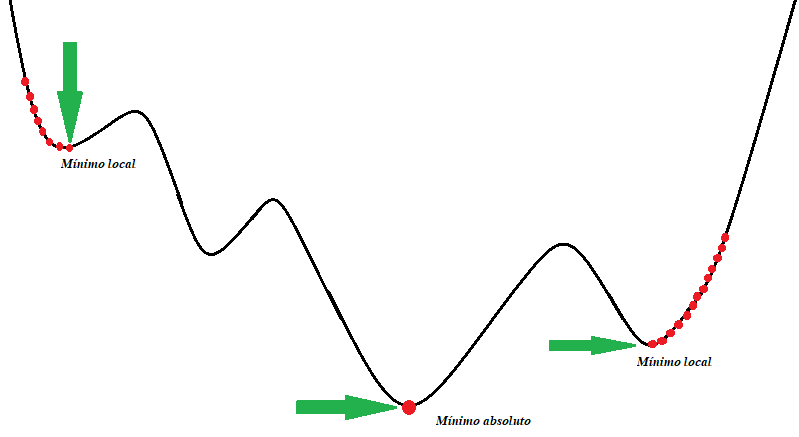

NOTA: En la práctica, actualmente es difícil caer en esto porque los algoritmo de ML que usan GD tienen muchos más parámetros que evitan caer en estos mínimos locales

##### Para el caso de $Learning Rate$ $\uparrow\uparrow\uparrow\uparrow$ (muy grande)

Error mínimo : 273.2524149341522


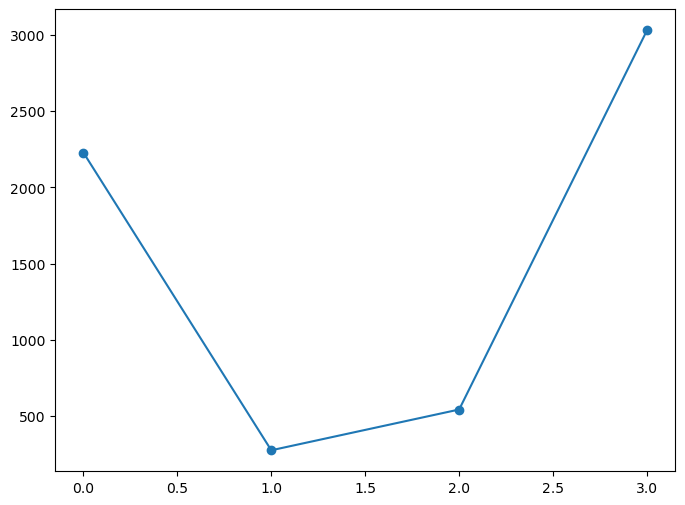

In [16]:
errors = []
for w in np.arange(1,11,3):
    regresion_lineal = LinearRegression()
    regresion_lineal.intercept_ = 0 # b = 0
    regresion_lineal.coef_ = np.array([w])

    prediccion_entrenamiento = regresion_lineal.predict(x.reshape(-1,1))
    mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
    errors.append(mse)
print(f'Error mínimo : {min(errors)}')
plt.figure(figsize=(8,6))
plt.plot(errors , '-o')
plt.show()

### ¿Cómo se vería la gráfica de GD en problemas de dos variables?

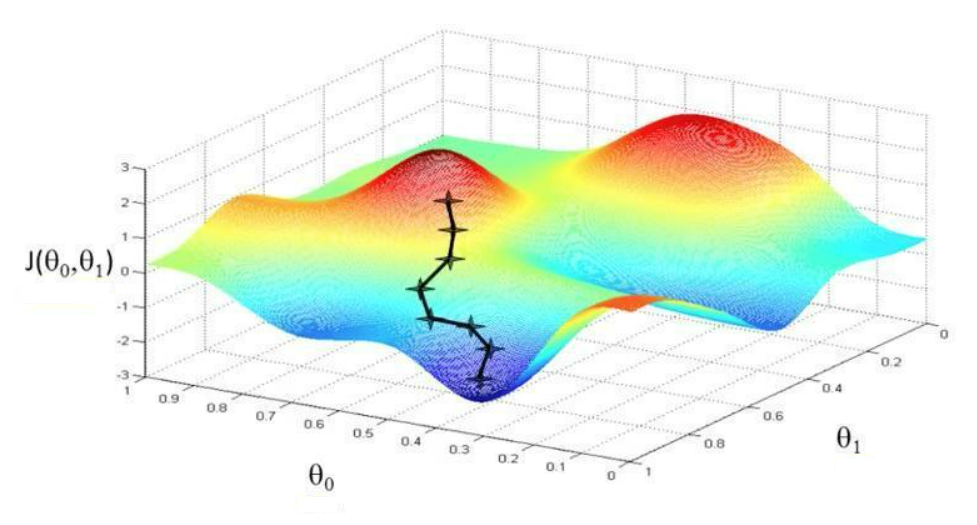

# Aplicación del Gradiente Descendente en RNA usando Keras

1. Veamos un video que nos resume todos los conceptos vistos hasta ahora.<br>
https://www.youtube.com/watch?v=A6FiCDoz8_4

2. <a href="https://keras.io/api/optimizers/" target="_blank">Keras optimizers</a>

Artículo de apoyo para entender que hacen los diferentes optimizadores
<a href="https://velascoluis.medium.com/optimizadores-en-redes-neuronales-profundas-un-enfoque-pr%C3%A1ctico-819b39a3eb5" target="_blank">Link</a>


3. <a href="https://keras.io/api/losses/" target="_blank">Loss functions</a>

#### Artículos
- <a href="https://rubialesalberto.medium.com/funciones-de-error-con-entropia-cross-entropy-y-binary-cross-entropy-8df8442cdf35" target="_blank">Funciones de error con Entropia: Cross Entropy y Binary Cross Entropy</a>